# About Dataset

## Context
This is a multivariate type of dataset, which means it provides or involves a variety of separate mathematical or statistical variables—multivariate numerical data analysis. It is composed of 14 attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), the slope of the peak exercise ST segment, number of major vessels, and Thalassemia. 

This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict, based on the given attributes of a patient, whether that particular person has heart disease or not. Another is the experimental task to diagnose and find out various insights from this dataset, which could help in understanding the problem more.

## Content

### Column Descriptions

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type (`typical angina`, `atypical angina`, `non-anginal`, `asymptomatic`)
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results  
    - Values: `normal`, `stt abnormality`, `lv hypertrophy`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (True/False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: `normal`, `fixed defect`, `reversible defect`
- **num**: The predicted attribute

## Import Libraries

In [50]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

#  for classification
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("./data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis (EDA)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [53]:

def eda(df):
    print("Shape of the dataset:", df.shape)
    print("Columns in the dataset:", df.columns.tolist())
    print("Data types of each column:\n", df.dtypes)
    print("Missing values in each column:\n", df.isnull().sum())
    print("Statistical summary of the dataset:\n", df.describe())
    
    # Visualizations
    # sns.countplot(x='target', data=df)
    # plt.title('Distribution of Target Variable')
    # plt.show()
    
    # sns.pairplot(df, hue='target')
    # plt.show()
eda(df)

Shape of the dataset: (920, 16)
Columns in the dataset: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Data types of each column:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Statistical summary of the dataset:
                id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.0000

In [54]:
# # draw a histogram to see the distribution of each feature
# def plot_histograms(df):
#     df.hist(bins=30, figsize=(15, 10), layout=(3, 4))
#     plt.tight_layout()
#     plt.show()
# plot_histograms(df)

In [55]:
# # Create separate visualizations for numeric and categorical features
# def plot_feature_distributions(df):
#     # Separate numeric and categorical columns
#     numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
#     categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    
#     # Plot numeric features
#     plt.figure(figsize=(15, 10))
#     for idx, col in enumerate(numeric_cols, 1):
#         plt.subplot(3, 4, idx)
#         plt.hist(df[col], bins=30)
#         plt.title(f'Distribution of {col}')
#         plt.xlabel(col)
#         plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()
    
#     # Plot categorical features
#     plt.figure(figsize=(15, 10))
#     for idx, col in enumerate(categorical_cols, 1):
#         plt.subplot(3, 3, idx)
#         df[col].value_counts().plot(kind='bar')
#         plt.title(f'Distribution of {col}')
#         plt.xlabel(col)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Call the new function
# plot_feature_distributions(df)

## Historgram for age column

Mean age: 53.51086956521739
Median age: 54.0
Mode age: 54


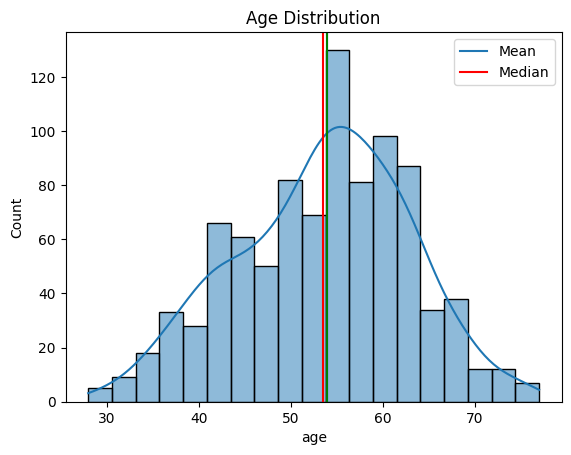

In [56]:
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")

plt.axvline(df["age"].mean(), color="red", )
plt.axvline(df["age"].median(), color="blue", )
plt.axvline(df["age"].mode()[0], color="green", )
plt.legend({"Mean": df["age"].mean(), "Median": df["age"].median()})

print("Mean age:", df["age"].mean())
print("Median age:", df["age"].median())
print("Mode age:", df["age"].mode()[0])

# expolre df based on gender for age column


In [57]:
fig = px.histogram(df, x="age", nbins=30,color='sex', title="Age Distribution")
fig.show()

In [58]:
# Find The values count of age column by grouping by sex column

df.groupby(df['sex'])['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [59]:
fig  = px.histogram(
    data_frame=df,
    x="age",
    color="dataset",
    title="Age Distribution",
)
fig.show()
print(df.groupby('dataset')['age'].mean())
print('\n')
print(df.groupby('dataset')['age'].median())
print('\n')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64


dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64


dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [60]:
# plot the countplot of dataset column
# sns.countplot(data=df, x='dataset', hue = 'sex')

# better plots with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


#### Let's explore cp (Chest Pain) column: 

In [61]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

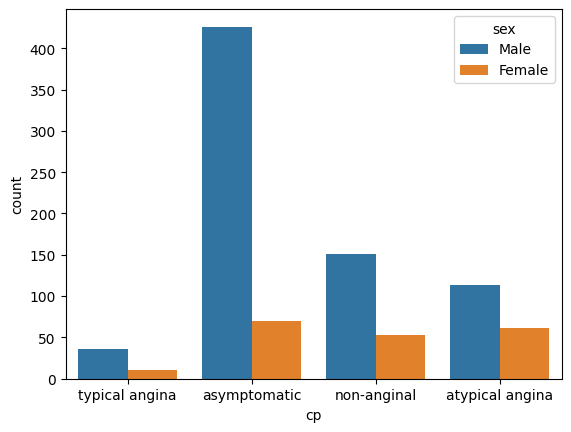

In [62]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

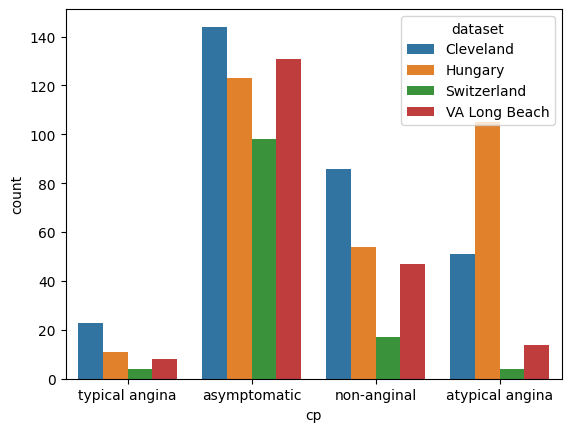

In [63]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [64]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()


#### Let'e explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

High blood pressure (hypertension) is generally considered dangerously high when systolic pressure is 180 mmHg or higher, or diastolic pressure is 120 mmHg or higher. Low blood pressure (hypotension) can be dangerous when it drops below 90/60 mmHg and causes symptoms like dizziness or fainting. 


In [65]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

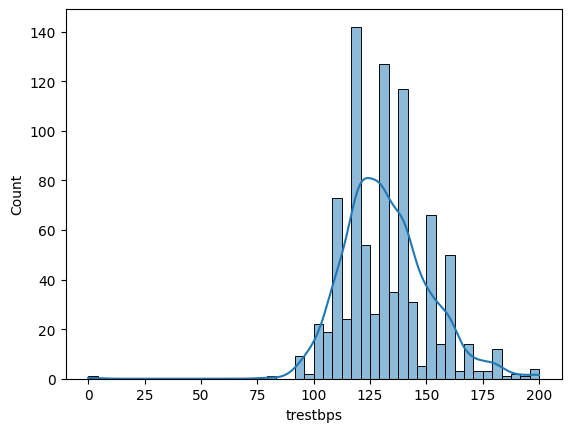

In [66]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

# Now we have to deal with columns having missing values


In [67]:
# Deal with missing values in trestbps column
# find the percentage of missing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


### this is just example for single column

In [68]:
# # impute the missing values of trestbps column using iterative imputer
# # create an object of iterative imputer


# imputer_1 = IterativeImputer(max_iter=10, random_state=42)

# # fit the imputer on trestbps column
# imputer_1.fit(df[['trestbps']])
# # transform the data
# df['trestbps'] = imputer_1.transform(df[['trestbps']])

# # check the missing values in trestbps column
# print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

In [69]:
df_copy = df.copy()
df_copy.columns[df_copy.notnull().all()].tolist()


['id', 'age', 'sex', 'dataset', 'cp', 'num']

---

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

In [70]:
missing_data_columns = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_columns

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [71]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']


def impute_categorical(passed_col):
    df_null = df[
        df[passed_col].isnull()
    ]  # this code choose those rows in which the passed column has null values
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_columns if col != passed_col]
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == "object" or X[col].dtype == "category":
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(
        estimator=RandomForestRegressor(random_state=42), add_indicator=True
    )
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print(
        f"the feature '{passed_col}' has been imputed with {round((acc_score * 100),2)} accuracy"
    )

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == "object" or X[col].dtype == "category":
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass

    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]


def impute_numeric_or_continous_missing_values(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_columns if col != passed_col]

    label_encode = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == "object" or X[col].dtype == "category":
            X[col] = label_encode.fit_transform(X[col])

    iterative_imputer = IterativeImputer(
        estimator=RandomForestRegressor(random_state=42), add_indicator=True
    )

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print(f"Mean Absolute Error (MAE) = {mean_absolute_error(y_test,y_pred)} \n")
    print(f"(RMSE) = {np.sqrt(mean_squared_error(y_test,y_pred))}")
    print(f"R2 = {r2_score(y_test,y_pred)}")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == "object" or X[col].dtype == "category":
            X[col] = label_encode.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]

In [72]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [73]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_columns:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical(col)
    elif col in numeric_cols:
        df[col] = impute_numeric_or_continous_missing_values(col)
    else:
        pass
    

Missing Values trestbps : 6.41%
Mean Absolute Error (MAE) = 13.097398843930637 

(RMSE) = 17.052426555921205
R2 = 0.09207458620799003
Missing Values chol : 3.26%
Mean Absolute Error (MAE) = 44.892640449438204 

(RMSE) = 63.760467265814924
R2 = 0.6779512426635348
Missing Values fbs : 9.78%
the feature 'fbs' has been imputed with 79.52 accuracy
Missing Values restecg : 0.22%
the feature 'restecg' has been imputed with 63.04 accuracy
Missing Values thalch : 5.98%
Mean Absolute Error (MAE) = 16.914161849710986 

(RMSE) = 21.918364050698663
R2 = 0.3014369895756277
Missing Values exang : 5.98%
the feature 'exang' has been imputed with 79.77 accuracy
Missing Values oldpeak : 6.74%
Mean Absolute Error (MAE) = 0.5637732558139534 

(RMSE) = 0.7902785680481781
R2 = 0.40499809761930317
Missing Values slope : 33.59%
the feature 'slope' has been imputed with 67.48 accuracy
Missing Values ca : 66.41%
the feature 'ca' has been imputed with 67.74 accuracy
Missing Values thal : 52.83%
the feature 'thal'

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### Outputs:
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
8. Write down the observations here about mean, median and mode of age column, grouped
dataset column.
9. Write down the observation from cp column here.
10. Write down the steps of Imputing missing values and why didi you choose those steps

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>

## See file for day 02